In [224]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from termcolor import colored
import warnings
warnings.filterwarnings('ignore')

In [225]:
data = pd.read_csv(r"C:\Users\Gazala Sharaf\OneDrive\Documents\MachineLearning\LogicPlum\test_diabetes.csv",delimiter=';')

In [226]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,NaN,148.0,72.0,35.0,0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94,28.1,0.167,21.0,0
4,0.0,NaN,40.0,35.0,168,43.1,2.288,NaN,1


In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               731 non-null    float64
 1   Glucose                   730 non-null    float64
 2   BloodPressure             734 non-null    float64
 3   SkinThickness             734 non-null    float64
 4   Insulin                   717 non-null    object 
 5   BMI                       733 non-null    float64
 6   DiabetesPedigreeFunction  728 non-null    float64
 7   Age                       717 non-null    float64
 8   Outcome                   768 non-null    object 
dtypes: float64(7), object(2)
memory usage: 54.1+ KB


In [228]:
data.isna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,True,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [229]:
data.isna().any()

Pregnancies                  True
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction     True
Age                          True
Outcome                     False
dtype: bool

In [230]:
data.isna().sum()

Pregnancies                 37
Glucose                     38
BloodPressure               34
SkinThickness               34
Insulin                     51
BMI                         35
DiabetesPedigreeFunction    40
Age                         51
Outcome                      0
dtype: int64

In [231]:
data['Glucose']

0      148.0
1       85.0
2      183.0
3       89.0
4        NaN
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767      NaN
Name: Glucose, Length: 768, dtype: float64

In [232]:
data['Outcome'].unique()

array(['1', '0', 'N', 'Y'], dtype=object)

In [233]:

data['Outcome'] = data['Outcome'].replace(['N',0],['Y',1])

In [234]:
data['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    Y
766    1
767    0
Name: Outcome, Length: 768, dtype: object

In [235]:
data['Outcome'].unique()

array(['1', '0', 'Y'], dtype=object)

In [236]:
data['Outcome'] = data['Outcome'].replace(['Y',1])

In [237]:
data['Outcome'].unique()

array(['1', '0'], dtype=object)

In [238]:
data['Outcome']=data.Outcome.astype(float)

Outcome is categorical -- you either have diabetes (1) or you dont (0) essentially like the Boolean True and False logical values rather than something countable

In [239]:
data['Age'].unique()

array([ 50.,  31.,  32.,  21.,  nan,  30.,  26.,  29.,  53.,  54.,  34.,
        57.,  59.,  33.,  27.,  41.,  51.,  43.,  22.,  38.,  60.,  28.,
        45.,  35.,  46.,  56.,  37.,  48.,  40.,  25.,  24.,  58.,  42.,
        44.,  39.,  36.,  23.,  -1.,  61.,  69.,  62.,  55.,  65.,  47.,
        52.,  66.,  49.,  63.,  67., 170., 200.,  72.,  81.,  64., 190.,
       150.,  70.,  68.])

In [240]:
data['Age'].sort_values()

230    -1.0
100    -1.0
392    21.0
182    21.0
623    21.0
       ... 
697     NaN
698     NaN
723     NaN
728     NaN
738     NaN
Name: Age, Length: 768, dtype: float64

In [241]:
data['Age'].sort_values(ascending=False)

451    200.0
600    190.0
450    170.0
620    150.0
459     81.0
       ...  
697      NaN
698      NaN
723      NaN
728      NaN
738      NaN
Name: Age, Length: 768, dtype: float64

In [242]:
data = data.replace({'Age':{-1:21, 200:22, 190:81, 170:81, 150:81}})

In [243]:
data['Age'].unique()

array([50., 31., 32., 21., nan, 30., 26., 29., 53., 54., 34., 57., 59.,
       33., 27., 41., 51., 43., 22., 38., 60., 28., 45., 35., 46., 56.,
       37., 48., 40., 25., 24., 58., 42., 44., 39., 36., 23., 61., 69.,
       62., 55., 65., 47., 52., 66., 49., 63., 67., 81., 72., 64., 70.,
       68.])

In [244]:
data.shape

(768, 9)

In [245]:
data['Insulin'].mode()

0    Zero
dtype: object

In [246]:
data['Outcome'].mode()

0    0.0
dtype: float64

In [247]:
data['Insulin']

0         0
1         0
2         0
3        94
4       168
       ... 
763     180
764    Zero
765     112
766    Zero
767    Zero
Name: Insulin, Length: 768, dtype: object

In [248]:
data['Insulin'] = data['Insulin'].replace(to_replace='Zero', value=0)
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness Insulin   BMI  \
0            NaN    148.0           72.0           35.0       0  33.6   
1            1.0     85.0           66.0           29.0       0  26.6   
2            8.0    183.0           64.0            0.0       0  23.3   
3            1.0     89.0           66.0           23.0      94  28.1   
4            0.0      NaN           40.0           35.0     168  43.1   
..           ...      ...            ...            ...     ...   ...   
763         10.0    101.0           76.0            NaN     180  32.9   
764          2.0    122.0           70.0           27.0       0  36.8   
765          5.0    121.0           72.0           23.0     112  26.2   
766          1.0    126.0           60.0            0.0       0  30.1   
767          1.0      NaN           70.0           31.0       0  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0      1.0  
1                       0.351

In [249]:
data['Insulin']

0        0
1        0
2        0
3       94
4      168
      ... 
763    180
764      0
765    112
766      0
767      0
Name: Insulin, Length: 768, dtype: object

In [250]:
data['Insulin'].mode()

0    0
dtype: object

In [251]:
data['Insulin']=data.Insulin.astype(float)

In [252]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               731 non-null    float64
 1   Glucose                   730 non-null    float64
 2   BloodPressure             734 non-null    float64
 3   SkinThickness             734 non-null    float64
 4   Insulin                   717 non-null    float64
 5   BMI                       733 non-null    float64
 6   DiabetesPedigreeFunction  728 non-null    float64
 7   Age                       717 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


HANDLING MISSING VALUES

In [253]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,731.000000,730.000000,734.000000,734.000000,717.000000,733.000000,728.000000,717.000000,768.000000
mean,3.824897,121.152055,69.008174,20.848774,79.994421,31.979536,0.472702,33.549512,0.345052
std,3.369400,31.774802,19.496036,15.876665,113.612888,7.918709,0.331714,12.209044,0.475695
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.500000,0.624500,41.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


FROM THE ABOVE DESCRIPTION WE CAN SEE THAT IN BELOW COLUMNS THE MINIMUM VALUE IS 0 WHICH IS POSSIBLE FOR PREGNANCIES BUT NOT POSSIBLE FOR THE BELOW COLUMNS
1) GLUCOSE
2) BP
3) SKIN THICKNESS
4) INSULIN
5) BMI
WHICH IMPLIES MISSING VALUES WHICH WILL BE REPLACED BY MEDIAN VALUE AS IT IS LEAST AFFECTED BY OUTLIERS

In [254]:
data.isnull().sum()

Pregnancies                 37
Glucose                     38
BloodPressure               34
SkinThickness               34
Insulin                     51
BMI                         35
DiabetesPedigreeFunction    40
Age                         51
Outcome                      0
dtype: int64

In [255]:
(data == 0).sum()

Pregnancies                 107
Glucose                       4
BloodPressure                35
SkinThickness               209
Insulin                     349
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     503
dtype: int64

In [256]:
numcols = data.select_dtypes(include=['float64']).columns
numcols

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [257]:
missing_numcols = numcols[data[numcols].isna().any()]

In [258]:
for x in missing_numcols:
    data[x] = data[x].fillna(data[x].median())

In [259]:
numcols[data[numcols].isna().any()]

Index([], dtype='object')

In [260]:
## changing the 0's to Nan values the features defined in zeros
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] =  data[['Glucose', 'BloodPressure', 
                                                                        'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)


#dropping the newly convertered NaNs
#data = data.dropna()

In [261]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,764.000000,733.000000,559.000000,419.000000,757.000000,768.000000,768.000000,768.000000
mean,3.785156,121.579843,72.442019,28.774597,141.269690,32.445178,0.467483,33.247396,0.345052
std,3.291875,29.805620,11.896456,10.279394,115.064664,6.754093,0.323716,11.850492,0.475695
min,0.000000,44.000000,30.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,22.000000,58.000000,27.700000,0.251000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,112.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,139.000000,80.000000,35.500000,181.000000,36.300000,0.602000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [262]:
data.isna().sum()

Pregnancies                   0
Glucose                       4
BloodPressure                35
SkinThickness               209
Insulin                     349
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

GLUCOSE/BP/BMI HAS SOME MISSING DATA
HOWEVER SKIN THICKNESS AND INSULIN HAS A VERY HIGH AMOUNT OF MISSING DATA
DROPPING THESE IS ILL ADVISED AS IT WILL LEAD TO MASSIVE INFORMATION LOSS AS DATA ONLY HAS 768 RECORDS TO BEGIN WITH

HENCE WE WILL IMPUTE WITH MEDIAN VALUES

In [263]:
data.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                28.0000
Insulin                     112.0000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [264]:
data.fillna(data.median(),inplace=True)

VERIFICATION OF MISSING VALUE IMPUTATION

In [265]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [266]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3.0,148.0,72.0,35.0,112.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,112.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,28.0,112.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,117.0,40.0,35.0,168.0,43.1,2.288,29.0,1.0


OUTLIER DETECTION AND REMOVAL

<AxesSubplot:xlabel='Age'>

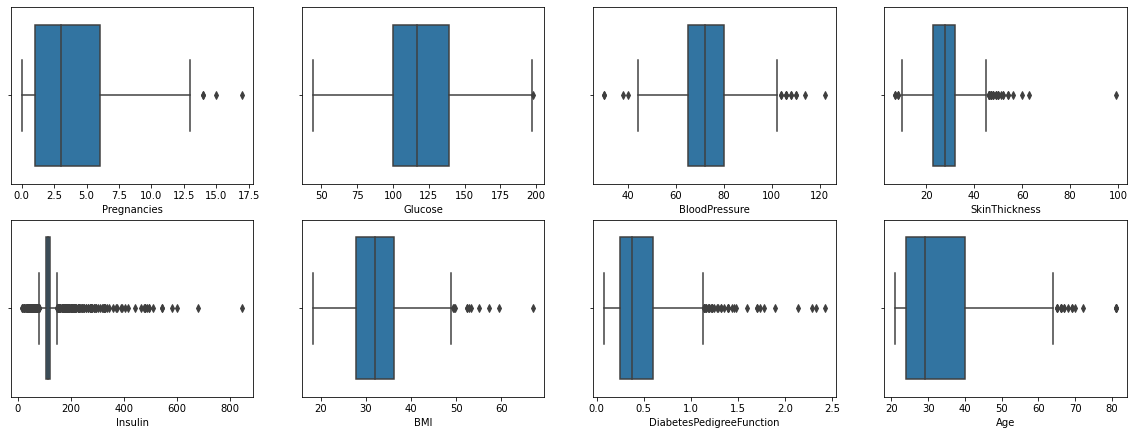

In [267]:
# The process of visualizing the variables with boxplot method was done. We find the outlier observations on the charts.
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(data["Pregnancies"])

plt.subplot(4,4,2)
sns.boxplot(data["Glucose"])

plt.subplot(4,4,3)
sns.boxplot(data["BloodPressure"])

plt.subplot(4,4,4)
sns.boxplot(data["SkinThickness"])

plt.subplot(4,4,5)
sns.boxplot(data["Insulin"])

plt.subplot(4,4,6)
sns.boxplot(data["BMI"])

plt.subplot(4,4,7)
sns.boxplot(data["DiabetesPedigreeFunction"])

plt.subplot(4,4,8)
sns.boxplot(data["Age"])

In [268]:
data['Pregnancies']=data['Pregnancies'].clip(lower=data['Pregnancies'].quantile(0.05),upper = data['Pregnancies'].quantile(0.95))

In [269]:
data['Glucose']=data['Glucose'].clip(lower=data['Glucose'].quantile(0.05),upper = data['Glucose'].quantile(0.95))

In [270]:
data['BloodPressure']=data['BloodPressure'].clip(lower=data['BloodPressure'].quantile(0.05),upper = data['BloodPressure'].quantile(0.95))

In [271]:
data['SkinThickness']=data['SkinThickness'].clip(lower=data['SkinThickness'].quantile(0.05),upper = data['SkinThickness'].quantile(0.95))

In [272]:
data['Insulin']=data['Insulin'].clip(lower=data['Insulin'].quantile(0.05),upper = data['Insulin'].quantile(0.95))

In [273]:
data['BMI']=data['BMI'].clip(lower=data['BMI'].quantile(0.05),upper = data['BMI'].quantile(0.95))

In [274]:
data['DiabetesPedigreeFunction']=data['DiabetesPedigreeFunction'].clip(lower=data['DiabetesPedigreeFunction'].quantile(0.05),upper = data['DiabetesPedigreeFunction'].quantile(0.95))

In [275]:
data['Age']=data['Age'].clip(lower=data['Age'].quantile(0.05),upper = data['Age'].quantile(0.95))

<AxesSubplot:xlabel='Age'>

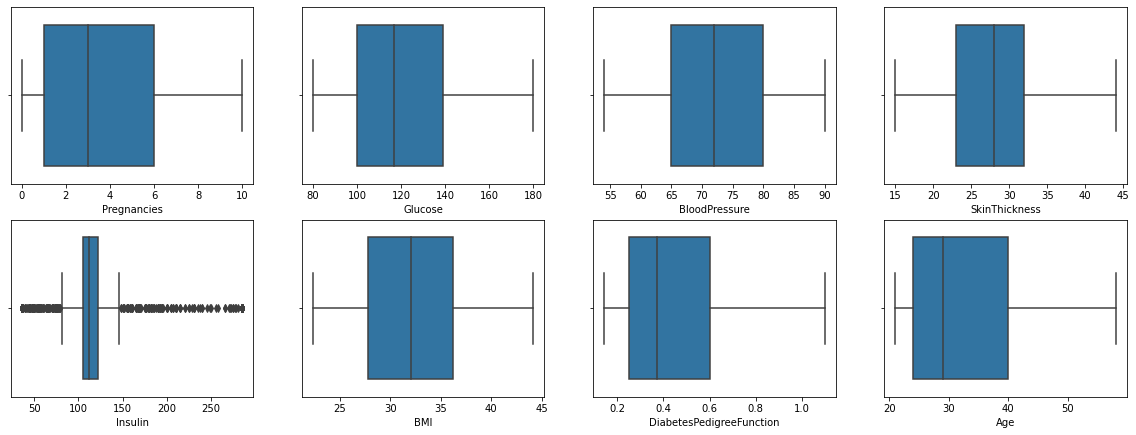

In [276]:
#verification after removal of outliers
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(data["Pregnancies"])

plt.subplot(4,4,2)
sns.boxplot(data["Glucose"])

plt.subplot(4,4,3)
sns.boxplot(data["BloodPressure"])

plt.subplot(4,4,4)
sns.boxplot(data["SkinThickness"])

plt.subplot(4,4,5)
sns.boxplot(data["Insulin"])

plt.subplot(4,4,6)
sns.boxplot(data["BMI"])

plt.subplot(4,4,7)
sns.boxplot(data["DiabetesPedigreeFunction"])

plt.subplot(4,4,8)
sns.boxplot(data["Age"])

#insulin is sustaining outliers even now so we will use a different approach to deal with it
#We suppress contradictory values
Q1 = data.Insulin.quantile(0.25)
Q3 = data.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
data.loc[data["Insulin"] > upper,"Insulin"] = upper

In [277]:
#insulin is sustaining outliers even now so we will use a different approach to deal with it
data['Insulin']=data['Insulin'].clip(lower=data['Insulin'].quantile(0.21),upper = data['Insulin'].quantile(0.80))

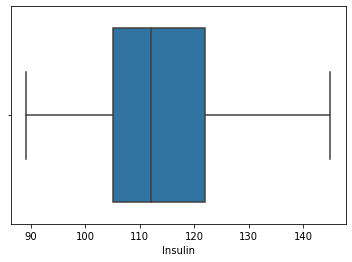

In [278]:

sns.boxplot(data["Insulin"]);

SINCE MAJOR MANIPULATION NEEDED TO BE DONE FOR INSULIN WE MAY CONSIDER REMOVE THE FEATURE ENTIRELY TO BETTER THE ULTIMATE MODEL

DATA VISUALISATION

<AxesSubplot:xlabel='Outcome', ylabel='count'>

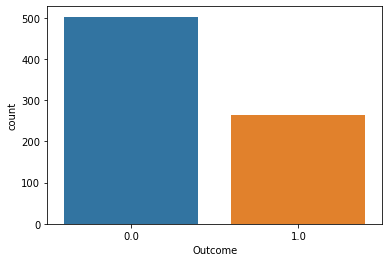

In [280]:
#DISTRIBUTION OF DIABETIC VS NON DIABETIC
sns.countplot(data['Outcome'])

PERCENTAGE DISTRIBUTION OF DIABETIC VS NON DIABETIC

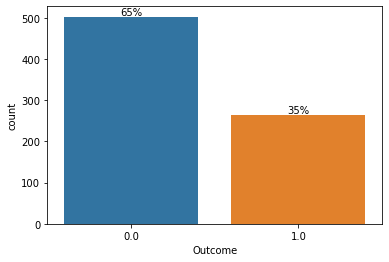

In [285]:
total = float(len(data))
ax = sns.countplot(x = 'Outcome',data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{0:.0%}'.format(height/total),
            ha='center')
    

CLASS IMBALANCE IS DEMONSTRATED HERE AS THERE ARE 65% NON DIABETIC PATIENTS

CORRELATION PLOT

<AxesSubplot:>

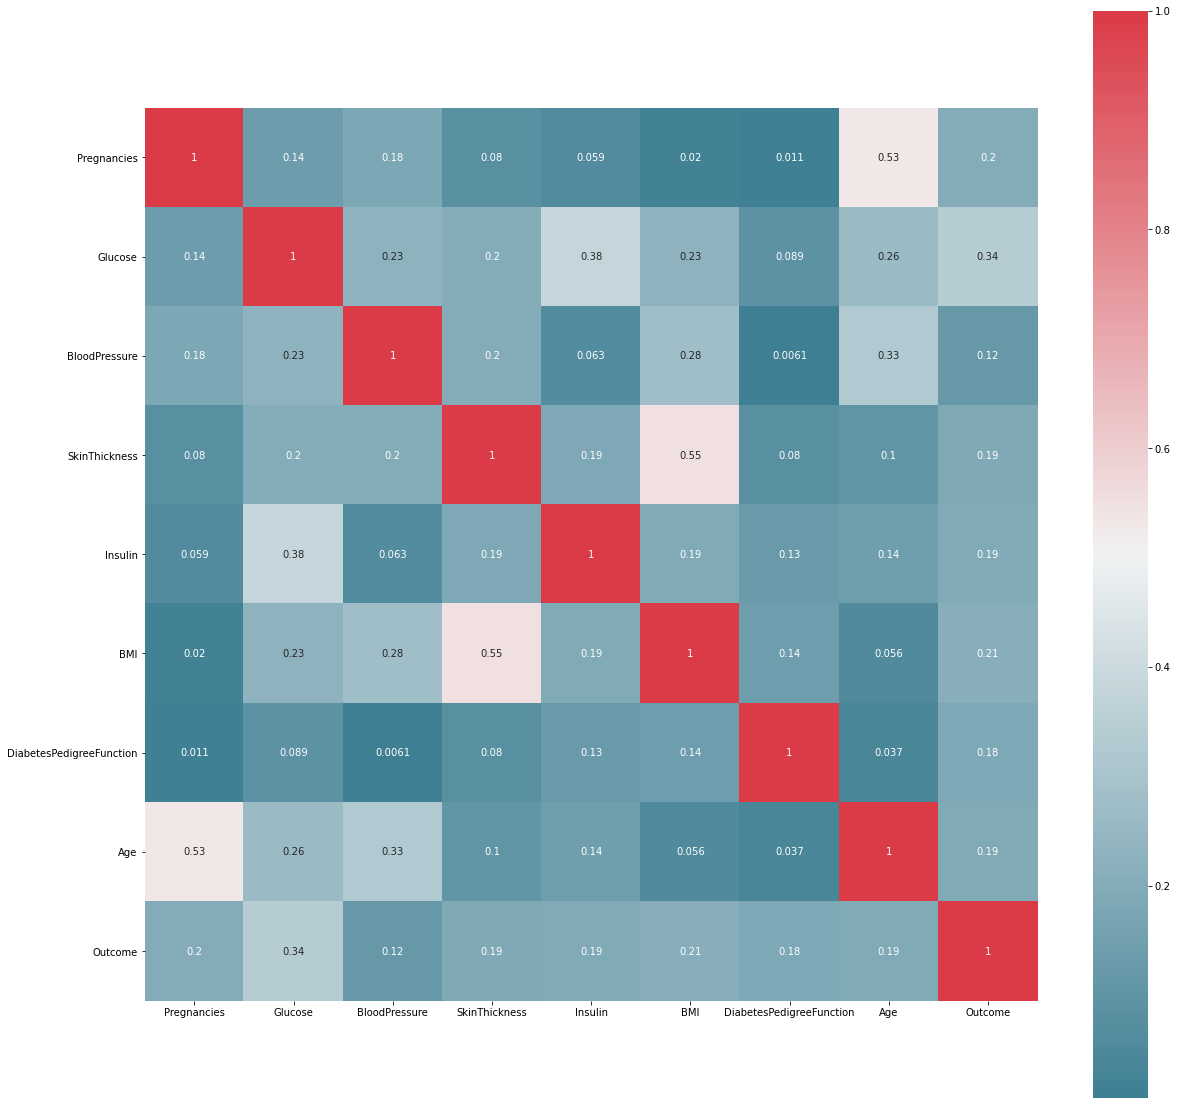

In [289]:
f, ax = plt.subplots(figsize=(20,20))
corr = data.corr("pearson")
sns.heatmap(corr, mask=np.zeros_like(corr,dtype = np.bool), cmap = sns.diverging_palette(220,10,as_cmap = True),
                                                          square=True, ax = ax, annot= True)

NO MULTICOLLINEARITY 

1. MOST CORRELATION WITH OUTCOME: GLUCOSE, AGE, BMI & PREGNANCIES
2. LITTLE CORRELATION WITH OUTCOME: INSULIN, DIABETESPEDIGREEFUNCTION
3. TINY CORRELATION WITH OUTCOME: BP, SKINTHICKNESS
4. LITTLE CORRELATION B/W AGE & PREGNANCIES/INSULIN & SKIN THICKNESS/BMI & SKIN THICKNESS,INSULIN & GLUCOSE

PAIRPLOT ANALYSIS

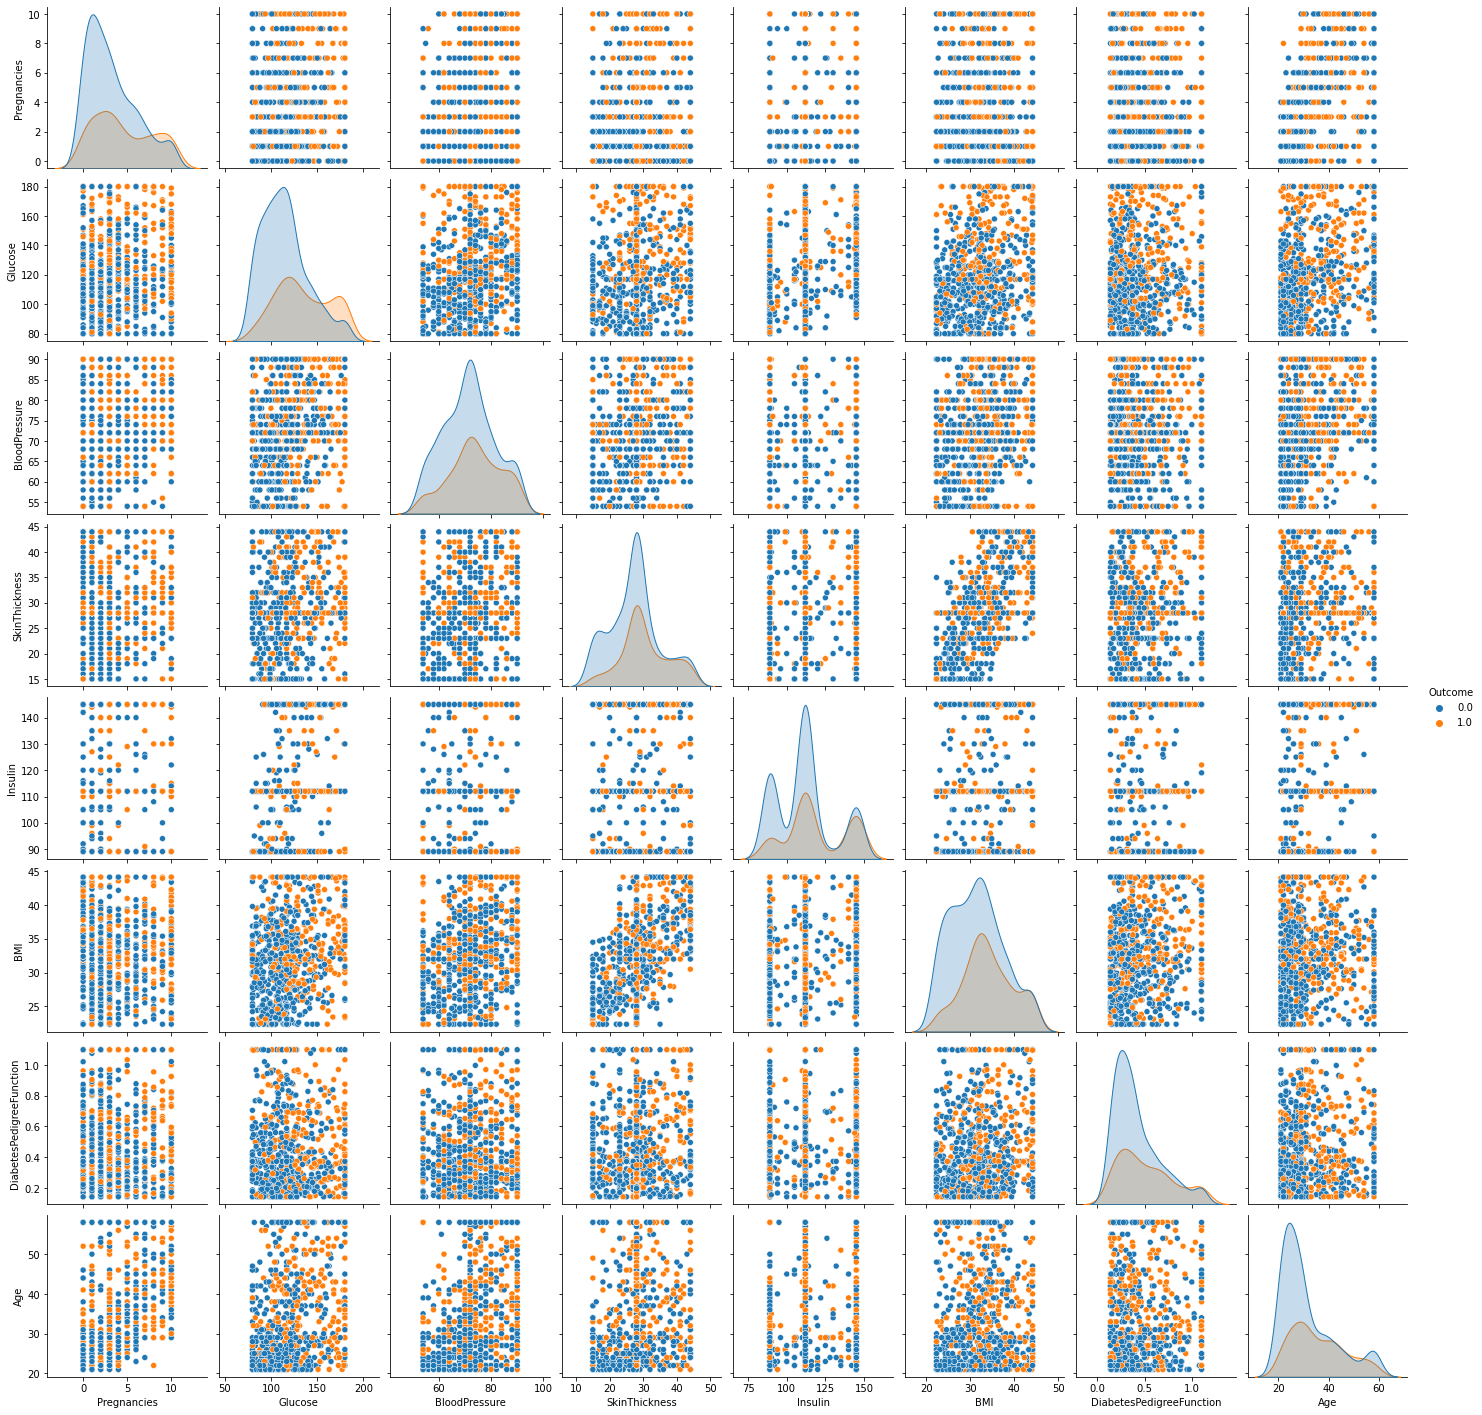

In [290]:
sns.pairplot(data,hue='Outcome', diag_kind='kde')

INFERENCES
1. MOST OF PREDICTOR VARIABLES ARE WEAK PREDICTORS OF OUTCOME
2. KERNAL DENSITY PLOTS(DIAGONAL) SHOWS THAT DISTRIBUTION FOR DIABETIC AND NON DIABETIC ARE SIMILAR AND OVERLAPPING
3. POORLY CORRELATED DATA,MODEL MAY NOT BE ABLE TO IDENTIFY HIDDEN PATTERNS OR MIGHT IDENTIFY NONSENSE PATTERNS
4. SOME R/SHIP EXISTS BETWEEN PARAMETERS. OUTCOME ASA HUE SHOWS THAT BLUE AND ORANGE DOTS ARE OVER LAPPING
5. PREGNANCIES AND AGE SHOW A KIBPND OF LINEAR LINE
6. BP & AGE LITTLE RELATION, MOST AGED PEOPLE HAVE BP
7. INSULIN AND GLUCOSE HAVE SOME RELATION

FEATURE ENGINEERING

def bmi_group(row):
    
    if row['BMI'] < 18.5:
        return '0'
    
    elif row['BMI'] > 18.5 and row['BMI'] < 25:
        return '1'
    
    elif row['BMI'] > 25 and row['BMI'] < 30:
        return '2' 
    
    elif row['BMI'] > 30 and row['BMI'] < 40:
        return '3'
    
    else:
        return '4'

data['bmi_status'] = data.apply(bmi_group,axis=1)

def age_group(row):
    
    if row['Age'] < 30:
        return '0'
    
    elif row['Age'] > 30 and row['Age'] > 62:
        return '1'
    
    else:
        return '2'

data['age_group'] = data.apply(age_group,axis=1)

def number_preg(row):
    
    if row['Pregnancies'] < 2:
        return '0'
    
    elif row['Pregnancies'] > 2 and row['Pregnancies'] < 5:
        return '1'
    
    else:
        return '2'
    
data['number_preg'] = data.apply(number_preg,axis=1)

In [291]:
def bp_group(row):
    
    if row["BloodPressure"]<60:
        return '0'
    
    elif row["BloodPressure"]>60 and row["BloodPressure"]<80:
        return '1'
    
    elif row["BloodPressure"]>80 and row["BloodPressure"]<90:
        return '2'
    
    else:
        return '3'
    

data['BloodPressure']== data.apply(bp_group, axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [292]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3.0,148.0,72.0,35.0,112.0,33.6,0.62700,50.0,1.0
1,1.0,85.0,66.0,29.0,112.0,26.6,0.35100,31.0,0.0
2,8.0,180.0,64.0,28.0,112.0,23.3,0.67200,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.16700,21.0,0.0
4,0.0,117.0,54.0,35.0,145.0,43.1,1.09925,29.0,1.0


In [293]:
# Ratio between BMI and skin thickness
data['BMI_SkinThickness_Ratio'] = data['BMI'] / data['SkinThickness']

In [294]:
data['glucose_and_DPF'] = data['Glucose'] * data['DiabetesPedigreeFunction']

In [295]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_SkinThickness_Ratio,glucose_and_DPF
0,3.0,148.0,72.0,35.0,112.0,33.6,0.62700,50.0,1.0,0.960000,92.79600
1,1.0,85.0,66.0,29.0,112.0,26.6,0.35100,31.0,0.0,0.917241,29.83500
2,8.0,180.0,64.0,28.0,112.0,23.3,0.67200,32.0,1.0,0.832143,120.96000
3,1.0,89.0,66.0,23.0,94.0,28.1,0.16700,21.0,0.0,1.221739,14.86300
4,0.0,117.0,54.0,35.0,145.0,43.1,1.09925,29.0,1.0,1.231429,128.61225


MODEL

In [296]:
# creating our X and y
y = data['Outcome']
x = data.drop(columns = 'Outcome')

In [297]:
#spliting the data between X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

#printing the shape of each set
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 10)
(154, 10)
(614,)
(154,)


In [298]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#machine learning metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

LOGISTIC REGRESSION

In [299]:
#creating logistic regression model
logistic_model = LogisticRegression(random_state=0)


#train the model
logistic_model.fit(x_train, y_train)


#making prediction
log_pred = logistic_model.predict(x_test)

#getting our results
log_r_f1 = f1_score(y_test, log_pred,average = 'micro')
log_r_auc = roc_auc_score(y_test, log_pred,average = 'micro')
log_r_acc = accuracy_score(y_test, log_pred)

#printing the classification report
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.84      0.75        98
         1.0       0.53      0.32      0.40        56

    accuracy                           0.65       154
   macro avg       0.61      0.58      0.58       154
weighted avg       0.63      0.65      0.62       154



ROC Curve for Logistic Regression

In [300]:
from sklearn.metrics import roc_curve
y_pred_proba = logistic_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

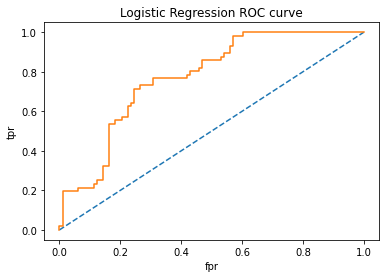

In [301]:
plt.plot([0,1],[0,1],'--')
plt.plot(fpr,tpr, label='Logistic Regression')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Logistic Regression ROC curve')
plt.show()

RANDOM FOREST

In [302]:
#Creating the random forest model
rf_model = RandomForestClassifier(random_state=0)

#train the model
rf_model.fit(x_train, y_train)


#making prediction
rf_pred = rf_model.predict(x_test)

#getting our results
rf_f1 = f1_score(y_test, rf_pred)
rf_auc = roc_auc_score(y_test, rf_pred)
rf_acc = accuracy_score(y_test, rf_pred)

#printing the classification report
print(classification_report(y_test, rf_pred))


              precision    recall  f1-score   support

         0.0       0.70      0.88      0.78        98
         1.0       0.62      0.36      0.45        56

    accuracy                           0.69       154
   macro avg       0.66      0.62      0.62       154
weighted avg       0.68      0.69      0.66       154



ROC Curve for Random Forest

In [303]:
y_pred_proba = rf_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

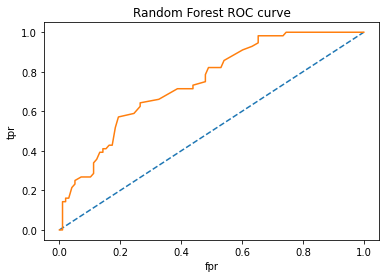

In [304]:
plt.plot([0,1],[0,1],'--')
plt.plot(fpr,tpr, label='Random Forest')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Random Forest ROC curve')
plt.show()

K NEAREST NEIGHBOR

In [305]:
#creating the random forest model
KNN_model = KNeighborsClassifier(n_neighbors=5)

#train the model
KNN_model.fit(x_train, y_train)


#making prediction
KNN_pred = KNN_model.predict(x_test)

#getting our results
KNN_f1 = f1_score(y_test, KNN_pred)
KNN_auc = roc_auc_score(y_test, KNN_pred)
KNN_acc = accuracy_score(y_test, KNN_pred)

#printing the classification report
print(classification_report(y_test, KNN_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.85      0.79        98
         1.0       0.64      0.48      0.55        56

    accuracy                           0.71       154
   macro avg       0.69      0.66      0.67       154
weighted avg       0.71      0.71      0.70       154



ROC Curve for KNN

In [306]:
from sklearn.metrics import roc_curve
y_pred_proba = KNN_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

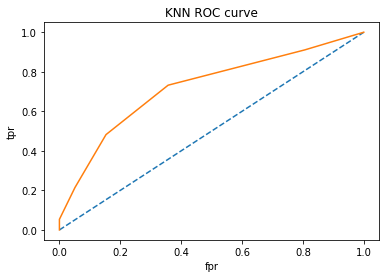

In [307]:
plt.plot([0,1],[0,1],'--')
plt.plot(fpr,tpr, label='KNN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('KNN ROC curve')
plt.show()

XG BOOST

In [308]:
import xgboost as xgb  #pip install xgboost

#creating XG Boost model
XGclassifier = xgb.XGBClassifier(learning_rate=0.01)  

#train the model
XGclassifier.fit(x_train, y_train)

#making prediction
xg_pred = XGclassifier.predict(x_test)

#getting our results
xg_b_f1 = f1_score(y_test, xg_pred,average = 'micro')
xg_b_auc = roc_auc_score(y_test, xg_pred,average = 'micro')
xg_b_acc = accuracy_score(y_test, xg_pred)

#printing the classification report
print(classification_report(y_test, xg_pred))

[02:57:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         0.0       0.70      0.83      0.76        98
         1.0       0.55      0.38      0.45        56

    accuracy                           0.66       154
   macro avg       0.63      0.60      0.60       154
weighted avg       0.65      0.66      0.64       154



ROC Curve for XGBoost

In [309]:
y_pred_proba = XGclassifier.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

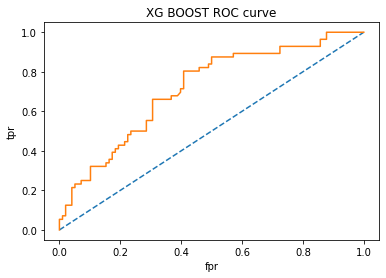

In [310]:
plt.plot([0,1],[0,1],'--')
plt.plot(fpr,tpr, label='XG BOOST')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('XG BOOST ROC curve')
plt.show()

Final Result

In [311]:
from tabulate import tabulate
results = [['Logistic Regression', round(log_r_f1,2), round(log_r_auc,2), round(log_r_acc,2)],
          ['Random Forest', round(rf_f1,2), round(rf_auc,2), round(rf_acc,2)],
          ['K Nearest Neighbors', round(KNN_f1,2), round(KNN_auc,2), round(KNN_acc,2)],
          ['XG Boost', round(xg_b_f1), round(xg_b_auc),round(xg_b_acc)]]    


#defining header names
col_names = ["Model", "F1 Score", "ROC AUC", "Accuracy"]


#creating a results table
print(tabulate(results, headers=col_names))

Model                  F1 Score    ROC AUC    Accuracy
-------------------  ----------  ---------  ----------
Logistic Regression        0.65       0.58        0.65
Random Forest              0.45       0.62        0.69
K Nearest Neighbors        0.55       0.66        0.71
XG Boost                   1          1           1


SAVING THE MODEL

In [312]:
import joblib
joblib.dump(XGclassifier, r'C:\Users\Gazala Sharaf\OneDrive\Documents\MachineLearning\models\diabetes_prediction.pkl')

['C:\\Users\\Gazala Sharaf\\OneDrive\\Documents\\MachineLearning\\models\\diabetes_prediction.pkl']

In [313]:
model2 = joblib.load(r'C:\Users\Gazala Sharaf\OneDrive\Documents\MachineLearning\models\diabetes_prediction.pkl')

In [314]:
type(model2)

xgboost.sklearn.XGBClassifier

In [315]:
type(XGclassifier)

xgboost.sklearn.XGBClassifier

In [316]:
def PredTest(model,X_test,X_train):
    ypred = model.predict(X_test)
    return ypred


In [317]:
def ValidPred(Y_pred,Y_test):
    xg_b_f1 = f1_score(Y_test, Y_pred,average = 'micro')
    xg_b_auc = roc_auc_score(Y_test, Y_pred,average = 'micro')
    xg_b_acc = accuracy_score(Y_test, Y_pred)
    col_names = ["Model", "F1 Score", "ROC AUC", "Accuracy"]
    results = [['XG Boost', round(xg_b_f1), round(xg_b_auc),round(xg_b_acc)]]   
    print(tabulate(results, headers=col_names))

    
    

In [318]:
prediction=PredTest(model2,x_test,x_train)


In [319]:
prediction

array([1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0.])

In [320]:
y_test

285    1.0
101    0.0
581    0.0
352    0.0
726    0.0
      ... 
563    0.0
318    1.0
154    1.0
684    1.0
643    0.0
Name: Outcome, Length: 154, dtype: float64

In [321]:
ValidPred(prediction,y_test)

Model       F1 Score    ROC AUC    Accuracy
--------  ----------  ---------  ----------
XG Boost           1          1           1
